# Les bibliothèques nécessaires

In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.spatial import distance

These libraries are commonly used in machine learning and data analysis tasks. 

1. `make_blobs` from `sklearn.datasets`:
   - `make_blobs` is a function provided by scikit-learn (`sklearn`) that is used to generate synthetic datasets for clustering and classification tasks. It creates clusters of data points with Gaussian distributions, making it useful for testing and demonstrating various machine learning algorithms.

2. `distance` from `scipy.spatial`:
   - `scipy.spatial.distance` provides functions for computing various distances between points in space. Distance metrics are essential for many machine learning and data analysis tasks, such as clustering, classification, and similarity-based operations.

In [14]:
centers = [ [1,3], [6,7] ]

data, labels = make_blobs(centers=centers, n_samples=10)

In [15]:
print(data)

[[ 5.23008071  5.16877761]
 [ 5.8551427   8.04201559]
 [ 5.90899441  7.55133403]
 [ 6.46650332  6.11718673]
 [ 1.0831416   4.40030893]
 [ 0.56700588  3.53394573]
 [ 1.60789798  3.27045953]
 [ 5.95317696  8.80400442]
 [ 2.40492568  0.99062885]
 [-0.44974136  1.36571957]]


In [16]:
print(labels)

[1 1 1 1 0 0 0 1 0 0]


<Axes: >

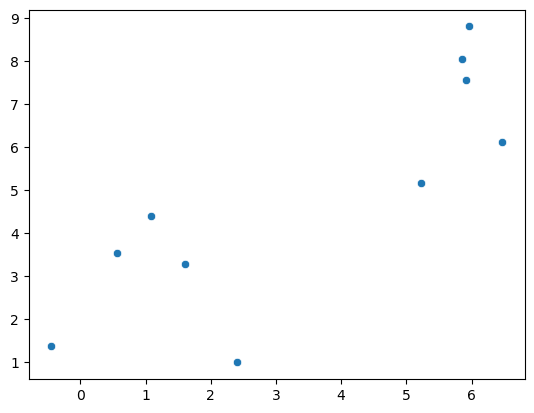

In [17]:
sns.scatterplot(
    x=[x[0] for x in data],
    y=[x[1] for x in data]
)

# Intertie

## inter_class_inertia

L'inertie inter-classes (ou "between-cluster variance" en anglais) est généralement calculée comme la somme des carrés des distances entre les centroïdes de chaque cluster (moyenne de chaque cluster) et le centroïde global (moyenne de l'ensemble des données). En termes mathématiques, l'expression de l'inertie inter-classes peut être formulée comme suit :

Supposons que vous ayez 'K' clusters, et que 'C_i' soit le centroïde du cluster 'i'. Le centroïde global est noté 'C_g'.

L'inertie inter-classes (I_inter) est donnée par :

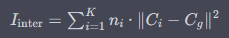

Où :
- (K) est le nombre de clusters.
- (ni) est le nombre de points dans le cluster \(i\).
- (Ci) est le centroïde du cluster \(i\).
- (Cg) est le centroïde global (moyenne de l'ensemble des données).
- (|| . ||) représente la norme euclidienne (distance euclidienne) entre deux vecteurs, qui mesure la distance entre les deux points dans l'espace.

Cette formule exprime l'inertie inter-classes comme la somme pondérée des carrés des distances entre les centroïdes de chaque cluster et le centroïde global. Elle mesure à quel point les clusters sont séparés les uns des autres. Une inertie inter-classes élevée indique une meilleure séparation entre les clusters.

In [65]:
def inter_class_inertia(data, labels):
    unique_labels = np.unique(labels)
    print("unique_labels =", unique_labels)
    global_centroid = np.mean(data, axis=0) # moyen sur les lignes 
    print("global_centroid =", global_centroid)
    inertia_inter = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        print("\ncluster_points =", cluster_points)
        centroid = np.mean(cluster_points, axis=0)
        print("centroid =", centroid)
        inertia_inter += np.sum((centroid - global_centroid) ** 2)
        print("inertia_inter =", inertia_inter)
    return inertia_inter

In [66]:
# Calcul du centroïde global
global_centroid = np.mean(data, axis=0)

# Calcul de l'inertie inter-classes
inertia_inter = sum(distance.euclidean(global_centroid, np.mean(data[labels == label], axis=0))**2 for label in np.unique(labels))
print("Inertie inter-classes :", inertia_inter)

Inertie inter-classes : 21.501330974644528


In [67]:
# inertia_inter = inter_class_inertia(data, labels)
# print("\n\n Inertie inter-classes :", inertia_inter)

unique_labels = [0 1]
global_centroid = [3.46271279 4.9244381 ]

cluster_points = [[ 1.0831416   4.40030893]
 [ 0.56700588  3.53394573]
 [ 1.60789798  3.27045953]
 [ 2.40492568  0.99062885]
 [-0.44974136  1.36571957]]
centroid = [1.04264596 2.71221252]
inertia_inter = 10.750665487322262

cluster_points = [[5.23008071 5.16877761]
 [5.8551427  8.04201559]
 [5.90899441 7.55133403]
 [6.46650332 6.11718673]
 [5.95317696 8.80400442]]
centroid = [5.88277962 7.13666368]
inertia_inter = 21.501330974644524


 Inertie inter-classes : 21.501330974644524


## intra_class_inertia

L'inertie intra-classes (Inertia Intra):
L'inertie intra-classes mesure la dispersion des points de données à l'intérieur de chaque cluster. Elle est calculée comme la somme des carrés des distances entre chaque point de données et le centroïde de son propre cluster, et cela pour tous les clusters. L'expression mathématique est la suivante :

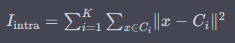

Où :
- (K) est le nombre de clusters.
- (Ci) est le i-ème cluster.
- (x) est un point de données dans le cluster \(C_i\).
- (Ci) est le centroïde du cluster \(C_i\).
- (|| . ||) représente la norme euclidienne (distance euclidienne) entre un point de données et le centroïde de son propre cluster.

In [54]:
def intra_class_inertia(data, labels):
    unique_labels = np.unique(labels)
    inertia_intra = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        for point in cluster_points:
            inertia_intra += np.sum((point - centroid) ** 2)
    return inertia_intra

In [68]:
# inertia_intra = sum(sum(distance.euclidean(point, np.mean(data[labels == label], axis=0))**2 for point in data[labels == label]) for label in np.unique(labels))
# print("Inertie intra-classes :", inertia_intra)

Inertie intra-classes : 22.70056100807487


In [69]:
inertia_intra = intra_class_inertia(data, labels)
print("Inertie intra-classes :", inertia_intra)

Inertie intra-classes : 22.70056100807487


## total_inertia

L'inertie totale (Inertia Totale):
L'inertie totale mesure la dispersion globale de l'ensemble des données. Elle est calculée comme la somme des carrés des distances entre chaque point de données et le centroïde global (moyenne de l'ensemble des données). L'expression mathématique est la suivante :

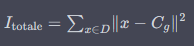

Où :
- (D) représente l'ensemble de données.
- (x) est un point de données dans l'ensemble de données.
- (Cg) est le centroïde global (moyenne de l'ensemble de données).
- (|| . ||) représente la norme euclidienne (distance euclidienne) entre un point de données et le centroïde global.

Ces expressions mathématiques vous permettent de calculer l'inertie intra-classes et l'inertie totale en utilisant les distances euclidiennes entre les points de données et les centroïdes correspondants. L'inertie totale est la somme de l'inertie intra-classes et de l'inertie inter-classes

In [57]:
def total_inertia(data):
    centroid = np.mean(data, axis=0) # ligne par ligne
    total_inertia = 0
    for point in data:
        total_inertia += np.sum((point - centroid) ** 2)
    return total_inertia

In [58]:
# inertia_total = sum(distance.euclidean(point, np.mean(data, axis=0))**2 for point in data)
# print("Inertie totale du dataset :", inertia_total)

In [89]:
def total_inertia(data):
    centroid = np.mean(data, axis=0)
    total_inertia = 0
    for point in data:
        total_inertia += np.sum((point - centroid) ** 2) # distance.euclidienne(point,g)**2
    return total_inertia #prof: total_inertia/len(data)

In [90]:
inertia_total = total_inertia(data)
print("Inertie totale du dataset :", inertia_total)

Inertie totale du dataset : 130.20721588129751


## Comparaion

In [91]:
abs( inertia_total - (inertia_intra + inertia_inter) )

86.00532389857813

## Regroupenment des clusters similaires (C1,C2)

In [103]:
def regroupenment(data, labels):
    
    nbr_cluster = np.unique(labels)
    list = [ 
        [] for _ in range(len(nbr_cluster)) 
    ]
    
    for i in range(data.shape[0]):
        list[labels[i]].append(data[i])
        
    return list

In [104]:
clusters = regroupenment(data,labels)

[[], []]


In [112]:
clusters[0]

[array([1.0831416 , 4.40030893]),
 array([0.56700588, 3.53394573]),
 array([1.60789798, 3.27045953]),
 array([2.40492568, 0.99062885]),
 array([-0.44974136,  1.36571957])]

In [113]:
intra_inertia = total_inertia(clusters[0]) + total_inertia(clusters[1])
intra_inertia

22.70056100807487